In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df1 = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2010-2011")
df2 = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2009-2010")

In [27]:
df = pd.concat([df1, df2], axis=0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [29]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
df['Country'].value_counts()

United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

In [31]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [32]:
df = df.dropna()

In [33]:
df.describe()

,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [34]:
df = df[df['Quantity']>0]
df = df[df['Price']>=0.01]

In [35]:
df['Amount'] = df['Quantity']*df['Price']

In [36]:
monetary = df.groupby('Customer ID')['Amount'].agg('sum')

In [37]:
monetary.head()

Customer ID
12346.0    77556.46
12347.0     5633.32
12348.0     2019.40
12349.0     4428.69
12350.0      334.40
Name: Amount, dtype: float64

In [38]:
df3 = df[['Customer ID', 'Invoice']]
df3 = df3.drop_duplicates()
freq = df3.groupby('Customer ID')['Invoice'].agg('count')

In [39]:
freq.head()

Customer ID
12346.0    12
12347.0     8
12348.0     5
12349.0     4
12350.0     1
Name: Invoice, dtype: int64

In [40]:
max_dt = max(df['InvoiceDate'])
max_dt

Timestamp('2011-12-09 12:50:00')

In [41]:
df['rec'] = max_dt - df['InvoiceDate']
df['rec'] = df['rec'].apply(lambda x: x.days)

In [42]:
recency = df.groupby('Customer ID')['rec'].agg('min')
recency = recency+1

In [51]:
RFM = pd.concat([monetary, recency, freq], join='inner', axis=1 )

In [52]:
RFM.head()

,Amount,rec,Invoice
Customer ID,,,
12346.0,77556.46,326,12
12347.0,5633.32,2,8
12348.0,2019.40,75,5
12349.0,4428.69,19,4
12350.0,334.40,310,1


In [53]:
RFM.shape

(5878, 3)

In [54]:
RFM.describe()

,Amount,rec,Invoice
count,5878.000000,5878.000000,5878.000000
mean,3018.616734,201.331916,6.289384
std,14737.731038,209.338707,13.009406
min,2.950000,1.000000,1.000000
25%,348.762500,26.000000,1.000000
50%,898.915000,96.000000,3.000000
75%,2307.090000,380.000000,7.000000
max,608821.650000,739.000000,398.000000


In [55]:
RFM.rename(columns={'Invoice':'Freq', 'rec':'Recency'}, inplace=True)

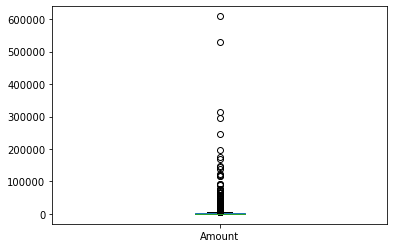

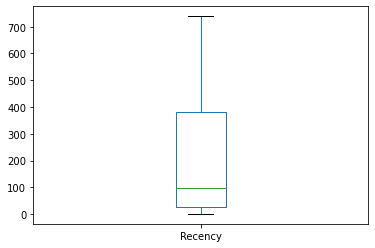

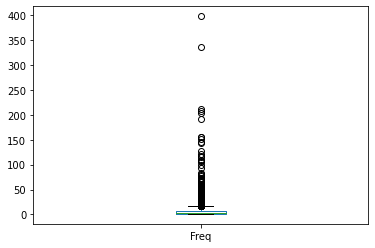

In [56]:
cols = list(RFM.columns)

for col in cols:
    RFM[col].plot(kind='box')
    plt.show()

In [58]:
q1 = RFM.quantile(0.25)
q3 = RFM.quantile(0.75)

IQR = q3-q1

RFM = RFM[~((RFM< (q1-1.5*IQR)) | (RFM> (q3+1.5*IQR)))]
RFM.shape

(5878, 3)

In [59]:
RFM = RFM.dropna()
RFM.shape

(5184, 3)

### Segmenting Customers based on RFM

In [60]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5184 entries, 12348.0 to 18287.0
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Amount   5184 non-null   float64
 1   Recency  5184 non-null   int64  
 2   Freq     5184 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 162.0 KB


In [61]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
RFMs = ss.fit_transform(RFM)

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans()

ssd = []
sscore = []

for i in range(2, 10):
    kmeans= KMeans(n_clusters=i, random_state=3)
    kmeans.fit(RFMs)
    ss1 = kmeans.inertia_
    ssd.append(ss1)
    sscore1 = silhouette_score(RFMs, kmeans.labels_)
    sscore.append(sscore1)

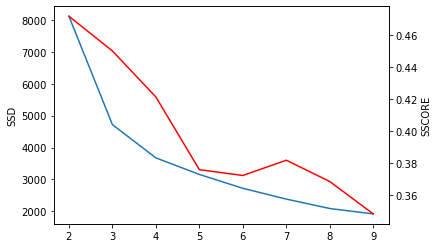

In [63]:
fig, ax = plt.subplots()
ax.plot(range(2,10), ssd)
ax.set_ylabel('SSD')
ax1=ax.twinx()
ax1.plot(range(2,10), sscore, 'r-')
ax1.set_ylabel('SSCORE')
plt.show()

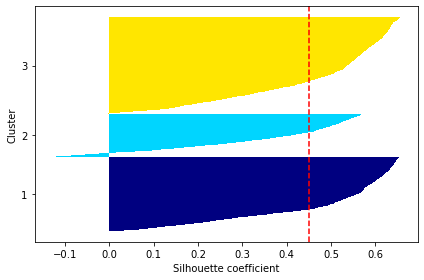

In [65]:
import plusmodules as pm
pm.svisualizer(RFMs, 3)

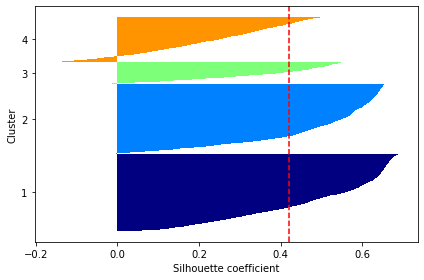

In [66]:
pm.svisualizer(RFMs, 4)

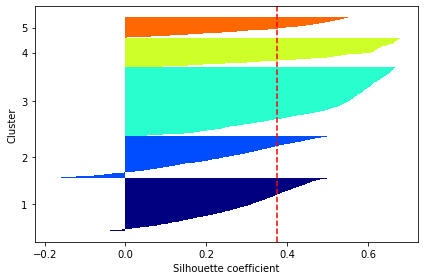

In [67]:
pm.svisualizer(RFMs, 5)

In [68]:
kmeans=KMeans(n_clusters=3, random_state=3)
kmeans.fit(RFMs)

RFM['cluster'] = kmeans.labels_

In [69]:
RFM['cluster'].value_counts()

2    2346
0    1800
1    1038
Name: cluster, dtype: int64

In [70]:
RFM.groupby(['cluster']).agg(['mean', 'count'])

Amount           Recency            Freq      
                mean count        mean count      mean count
cluster                                                     
0         512.701178  1800  475.729444  1800  1.800000  1800
1        2993.569094  1038   78.602119  1038  8.750482  1038
2         805.119182  2346   89.091219  2346  2.916454  2346

In [71]:
rec = RFM.groupby(['cluster'])['Recency'].agg(['mean'])
freq = RFM.groupby(['cluster'])['Freq'].agg(['mean'])
monetary = RFM.groupby(['cluster'])['Amount'].agg(['mean'])

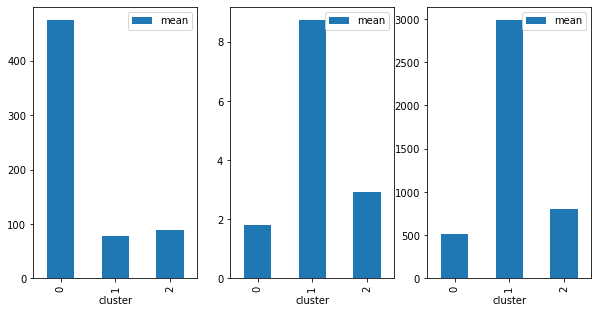

In [72]:
fig, axis = plt.subplots(1, 3, figsize=(10, 5))
rec.plot.bar(ax=axis[0])
freq.plot.bar(ax=axis[1])
monetary.plot.bar(ax=axis[2])
plt.show()